In [1]:
#! pip install phik

In [2]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import date
import phik
import random
from scipy.stats import boxcox, norm, skew, probplot
from scipy.special import boxcox1p, inv_boxcox, inv_boxcox1p

In [3]:
#Loading the dataset into a Data frame
# vehicles_df = pd.read_csv("vehicles.csv", index_col = None)
# vehicles_df.shape


The vehicles.csv file has so many records. we will only take a sample of 50000 records from the above sample

reference: https://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame


In [4]:
#vehicles_df.shape[0] - 1

In [5]:
# filename = "vehicles.csv"
# n = vehicles_df.shape[0] - 1 #number of records in file (excludes header)
# s = 50000 #desired sample size
# skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
# vehicles_df = pd.read_csv(filename, skiprows=skip)
# vehicles_df.to_csv("vehicle_sample.csv")


In [6]:
vehicles_df = pd.read_csv("vehicle_sample.csv")

In [7]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50001 non-null  int64  
 1   id            50001 non-null  int64  
 2   url           50001 non-null  object 
 3   region        50001 non-null  object 
 4   region_url    50001 non-null  object 
 5   price         50001 non-null  int64  
 6   year          49847 non-null  float64
 7   manufacturer  47968 non-null  object 
 8   model         49427 non-null  object 
 9   condition     29640 non-null  object 
 10  cylinders     29248 non-null  object 
 11  fuel          49627 non-null  object 
 12  odometer      49482 non-null  float64
 13  title_status  49016 non-null  object 
 14  transmission  49703 non-null  object 
 15  VIN           31208 non-null  object 
 16  drive         34657 non-null  object 
 17  size          14083 non-null  object 
 18  type          39209 non-nu

In [8]:
df1 = vehicles_df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50001 non-null  int64  
 1   id            50001 non-null  int64  
 2   url           50001 non-null  object 
 3   region        50001 non-null  object 
 4   region_url    50001 non-null  object 
 5   price         50001 non-null  int64  
 6   year          49847 non-null  float64
 7   manufacturer  47968 non-null  object 
 8   model         49427 non-null  object 
 9   condition     29640 non-null  object 
 10  cylinders     29248 non-null  object 
 11  fuel          49627 non-null  object 
 12  odometer      49482 non-null  float64
 13  title_status  49016 non-null  object 
 14  transmission  49703 non-null  object 
 15  VIN           31208 non-null  object 
 16  drive         34657 non-null  object 
 17  size          14083 non-null  object 
 18  type          39209 non-nu

In [9]:
df1.isnull().sum()

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year              154
manufacturer     2033
model             574
condition       20361
cylinders       20753
fuel              374
odometer          519
title_status      985
transmission      298
VIN             18793
drive           15344
size            35918
type            10792
paint_color     15355
image_url           5
description         5
county          50001
state               0
lat               793
long              793
posting_date        5
dtype: int64

In [10]:
#dropping unnecessary variables
df1.drop(columns = ["Unnamed: 0",'url', 'region_url','VIN', 'lat', 'long','county', "id"], inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        50001 non-null  object 
 1   price         50001 non-null  int64  
 2   year          49847 non-null  float64
 3   manufacturer  47968 non-null  object 
 4   model         49427 non-null  object 
 5   condition     29640 non-null  object 
 6   cylinders     29248 non-null  object 
 7   fuel          49627 non-null  object 
 8   odometer      49482 non-null  float64
 9   title_status  49016 non-null  object 
 10  transmission  49703 non-null  object 
 11  drive         34657 non-null  object 
 12  size          14083 non-null  object 
 13  type          39209 non-null  object 
 14  paint_color   34646 non-null  object 
 15  image_url     49996 non-null  object 
 16  description   49996 non-null  object 
 17  state         50001 non-null  object 
 18  posting_date  49996 non-nu

### Now we have only 18 columns.

In [11]:
## Adding additional columns which take a boolean value if some information is provided or not.
## we need to know the unique values of features such as 
# ["manufacturer", "region", "model", "condition", "cylinders","fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
temp_cols = ["manufacturer", "region", "model", "condition", "cylinders","fuel", \
             "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]

for i in temp_cols:
    print("for the column",i)
    print(df1[i].unique())
    print(len(df1[i].unique()))
    print()

for the column manufacturer
['toyota' 'ford' 'chevrolet' 'honda' 'buick' 'volvo' 'hyundai'
 'mercedes-benz' nan 'jeep' 'lincoln' 'dodge' 'chrysler' 'kia' 'ram'
 'nissan' 'mitsubishi' 'subaru' 'pontiac' 'gmc' 'infiniti' 'fiat' 'acura'
 'lexus' 'mini' 'volkswagen' 'audi' 'alfa-romeo' 'cadillac' 'jaguar' 'bmw'
 'rover' 'mazda' 'saturn' 'tesla' 'mercury' 'harley-davidson' 'porsche'
 'datsun' 'aston-martin' 'land rover' 'ferrari']
42

for the column region
['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merc

### creating a column image_available to know if there is an image available

In [12]:
df1["image_available"] = 1* ~(df1['image_url'].isnull())
df1[["image_available","image_url"]]

,image_available,image_url
0,1,https://images.craigslist.org/00Q0Q_lVfMOkbtUO...
1,1,https://images.craigslist.org/00t0t_6t4cNaVZFh...
2,1,https://images.craigslist.org/00404_3mXHJgsyEy...
3,1,https://images.craigslist.org/00H0H_b24A2x1Gzu...
4,1,https://images.craigslist.org/00a0a_7ojpNN3PG0...
...,...,...
49996,1,https://images.craigslist.org/00z0z_idzh9FXRKc...
49997,1,https://images.craigslist.org/00R0R_9w54F9aZHi...
49998,1,https://images.craigslist.org/01717_8XkvLpjFIU...
49999,1,https://images.craigslist.org/00u0u_eRGgkSql5l...


### creating a column desc_available to know if there is a description available or not

In [13]:
df1["desc_available"] = 1* ~(df1['description'].isnull())
df1[["desc_available","description"]]

,desc_available,description
0,1,Carvana is the safer way to buy a car During t...
1,1,Carvana is the safer way to buy a car During t...
2,1,Carvana is the safer way to buy a car During t...
3,1,Carvana is the safer way to buy a car During t...
4,1,Carvana is the safer way to buy a car During t...
...,...,...
49996,1,2005 Nissan Altima 2.5 SL ☎ 406-283-3311 Call ...
49997,1,2009 Toyota Matrix S AWD 4-Speed AT ☎ 406-283-...
49998,1,Carvana is the safer way to buy a car During t...
49999,1,Carvana is the safer way to buy a car During t...


In [14]:
current_year = date.today().year
df1["Age"] = (df1["year"].apply(lambda x: current_year - x))
df1[["Age","year"]]

,Age,year
0,8.0,2014.0
1,2.0,2020.0
2,5.0,2017.0
3,4.0,2018.0
4,2.0,2020.0
...,...,...
49996,17.0,2005.0
49997,13.0,2009.0
49998,4.0,2018.0
49999,2.0,2020.0


In [15]:
df_cols = list(df1.columns)
df_cols.remove('price')
df_cols

['region',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'state',
 'posting_date',
 'image_available',
 'desc_available',
 'Age']

In [16]:
import phik
from phik.phik import phik_from_hist2d

In [17]:
df1[["model","price"]].phik_matrix()

interval columns not set, guessing: ['price']


C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable model is large: 9251. Are you sure this is not an interval variable? Analysis for pairs of variables including model can be slow.
  warnings.warn(


,model,price
model,1.000000,0.814335
price,0.814335,1.000000


In [18]:
df1[["model","price"]].phik_matrix().loc["model", "price"]

interval columns not set, guessing: ['price']


C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable model is large: 9251. Are you sure this is not an interval variable? Analysis for pairs of variables including model can be slow.
  warnings.warn(


0.8143348857283952

In [19]:
df1["year"].value_counts(normalize=True).max()


0.0858226172086585

In [20]:
print(df1["fuel"].mode()[0])

gas


In [21]:
def get_summary_table(df1: pd.DataFrame,
                      target_col: str,
                      corr_method: str="pearson",
                      descr_df: pd.DataFrame=None,
                      descr_cols: list=df_cols) -> pd.DataFrame:
    """Return a pandas dataframe where each row corresponds to a column of df
    and each column contans some properties of that column from df.

    Parameters
    ----------
    df : pd.DataFrame
        The pandas dataframe of shape (N, K) containing the data.
    target_col : str
        The label of the column that contains the variable of interest which
        will be studied as the dependent variable. 
    corr_method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
        Method to be used to compute the correlation with target col. By default
        is 'pearson'.
    descr_df : pd.DataFrame, optional
        If dataframe is passed, it will be merged on summary table. The passed
        dataframe should have the variables codes as index. If None, nothing
        happens. By default is None.
    descr_cols : list[str], optional
        List of columns labels to be imported from descr_df. By default is
        'Label' and 'Type'.

    Returns
    -------
    pd.DataFrame
        Dataframe of shape (K, 9).
    """
    df_summary = pd.DataFrame({
    "IS_NUMERIC": df1.apply(lambda x: int(is_numeric_dtype(x))),
    "N_UNIQUE" : df1.apply(lambda x: x.nunique()),
    "NA_ABS" : df1.apply(lambda x: x.isna().sum()),
    "NA_REL": df1.apply(lambda x: x.isna().mean()),
    "MIN": df1.apply(lambda x: x.min() if is_numeric_dtype(x) else np.nan),
    "MAX": df1.apply(lambda x: x.max() if is_numeric_dtype(x) else np.nan),
    # "MEAN": df1.apply(lambda x: x.mean() if is_numeric_dtype(x) else np.nan),
    # "MEDIAN": df1.apply(lambda x: x.median() if is_numeric_dtype(x) else np.nan),
    "CORR_TARGET": df1.apply(lambda x: x.corr(df1[target_col], method=corr_method) if is_numeric_dtype(x) else np.nan),
    "SHARE_MOST_FREQ": df1.apply(lambda x: x.mode()[0]),
    }).round(2)
    df_summary.sort_index(inplace=True)
    
    if descr_df is None:
        return df_summary
    
    df_summary = pd.merge(
        df_summary,
        df1[df_cols],
        how="left",
        left_index=True,
        right_index=True
    )
    df_summary.columns = df_summary.columns.str.upper()
    return df_summary


In [22]:
df_summary = get_summary_table(df1, target_col="price")
df_summary

,IS_NUMERIC,N_UNIQUE,NA_ABS,NA_REL,MIN,MAX,CORR_TARGET,SHARE_MOST_FREQ
Age,1,101,154,0.00,0.0,122.0,0.02,5.0
condition,0,6,20361,0.41,NaN,NaN,NaN,good
cylinders,0,8,20753,0.42,NaN,NaN,NaN,6 cylinders
desc_available,1,2,0,0.00,0.0,1.0,0.00,1
description,0,47586,5,0.00,NaN,NaN,NaN,CREDIT CARS- $700.00 DOWN- RIGHT ON THE CORNER...
drive,0,3,15344,0.31,NaN,NaN,NaN,4wd
fuel,0,5,374,0.01,NaN,NaN,NaN,gas
image_available,1,2,0,0.00,0.0,1.0,0.00,1
image_url,0,40303,5,0.00,NaN,NaN,NaN,https://images.craigslist.org/00N0N_1xMPvfxRAI...
manufacturer,0,41,2033,0.04,NaN,NaN,NaN,ford


In [23]:
df_summary[["N_UNIQUE", "NA_ABS", "NA_REL", "CORR_TARGET"]]

,N_UNIQUE,NA_ABS,NA_REL,CORR_TARGET
Age,101,154,0.00,0.02
condition,6,20361,0.41,NaN
cylinders,8,20753,0.42,NaN
desc_available,2,0,0.00,0.00
description,47586,5,0.00,NaN
drive,3,15344,0.31,NaN
fuel,5,374,0.01,NaN
image_available,2,0,0.00,0.00
image_url,40303,5,0.00,NaN
manufacturer,41,2033,0.04,NaN


### Removing the columns ["posting_date", "image_url", "id", "size", "year"] as these features will not be useful for us
size - more than 70% of null values 
year - since Age is there year is not required
posting date - might not affect the price of a car that much
model - too many unique values


In [24]:
df1.drop(columns = ["posting_date", "image_url", "size"], inplace = True)

In [25]:
import phik
Corr_mat = df1.drop(columns = "description").phik_matrix()

interval columns not set, guessing: ['price', 'year', 'odometer', 'image_available', 'desc_available', 'Age']


C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable model is large: 9251. Are you sure this is not an interval variable? Analysis for pairs of variables including model can be slow.
  warnings.warn(


In [26]:
Corr_mat

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,image_available,desc_available,Age
region,1.000000,0.136412,0.259235,0.356055,0.000000,0.384088,0.265720,0.266645,0.189967,0.235577,0.432613,0.424821,0.380230,0.220373,0.999950,0.000000,0.000000,0.248105
price,0.136412,1.000000,0.047060,0.000000,0.814335,0.045513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046723
year,0.259235,0.047060,1.000000,0.267562,0.959813,0.238707,0.158862,0.184243,0.128502,0.138637,0.492240,0.373950,0.226013,0.204415,0.105924,NaN,NaN,0.999990
manufacturer,0.356055,0.000000,0.267562,1.000000,0.999993,0.192525,0.675255,0.619000,0.032131,0.093069,0.365117,0.693247,0.664533,0.301041,0.233936,NaN,NaN,0.267455
model,0.000000,0.814335,0.959813,0.999993,1.000000,0.766448,0.965420,0.954022,0.924299,0.622725,0.931469,0.963650,0.978712,0.799420,0.744606,NaN,NaN,0.967576
condition,0.384088,0.045513,0.238707,0.192525,0.766448,1.000000,0.144347,0.222634,0.072550,0.399067,0.701734,0.232660,0.281088,0.177599,0.233153,NaN,NaN,0.226068
cylinders,0.265720,0.000000,0.158862,0.675255,0.965420,0.144347,1.000000,0.278339,0.000000,0.055621,0.240334,0.518022,0.480163,0.172027,0.174010,NaN,NaN,0.174509
fuel,0.266645,0.000000,0.184243,0.619000,0.954022,0.222634,0.278339,1.000000,0.009152,0.038920,0.314384,0.207679,0.418677,0.152748,0.166647,NaN,NaN,0.184441
odometer,0.189967,0.000000,0.128502,0.032131,0.924299,0.072550,0.000000,0.009152,1.000000,0.000000,0.040741,0.035830,0.014497,0.053908,0.000000,NaN,NaN,0.131835
title_status,0.235577,0.000000,0.138637,0.093069,0.622725,0.399067,0.055621,0.038920,0.000000,1.000000,0.140171,0.075104,0.057264,0.051685,0.150846,NaN,NaN,0.139322


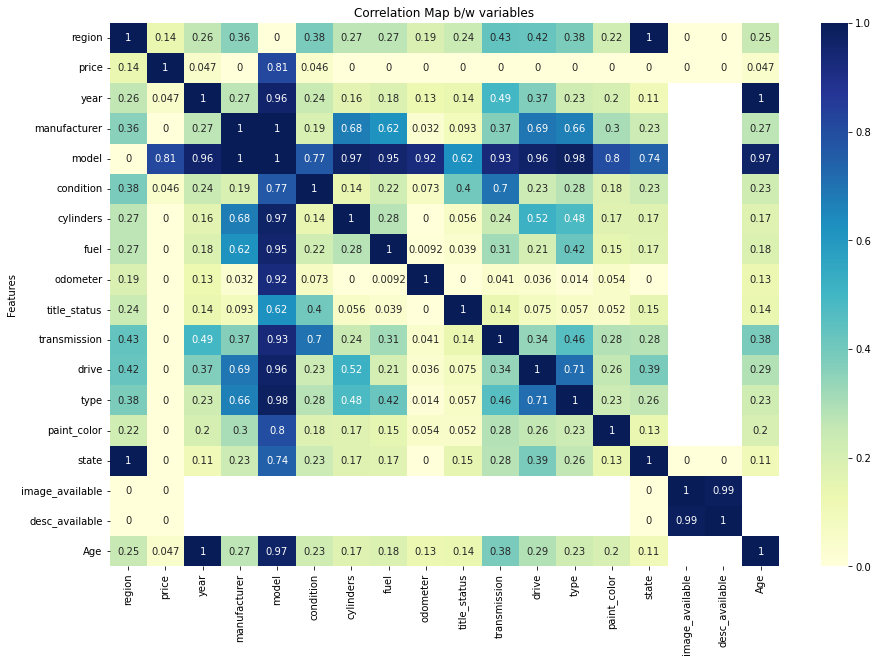

In [27]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(Corr_mat, annot = True, cmap="YlGnBu")
plt.title('Correlation Map b/w variables')
plt.ylabel('Features')
plt.show()

### from the above heat map we can see that 
### 1.Model is highly correlated with manufacturer, price and a many other variables.
### 2.Region is highly correlated with state

In [28]:
df1.drop(columns = ["model","state"], inplace = True)

In [29]:
## dropping duplicate records:

df1.drop_duplicates(inplace =True)
print('No. of duplicate records dropped are {}'.format(vehicles_df.shape[0]-df1.shape[0]))

No. of duplicate records dropped are 779


In [30]:
print(len(df1.columns))
df1.columns

17


Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'image_available', 'desc_available',
       'Age'],
      dtype='object')

In [31]:
## Adding additional columns which take a boolean value if some information is provided or not.
## we need to know the unique values of features such as 
# ["manufacturer", "region", "model", "condition", "cylinders","fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
temp_cols = ["manufacturer", "condition", "cylinders", "fuel", \
             "title_status", "transmission", "drive", "type", "paint_color", "region"]

for i in temp_cols:
    print("for the column",i)
    print(df1[i].value_counts())
    print("Number of Unique values",df1[i].nunique())
    print()

for the column manufacturer
ford               8211
chevrolet          6287
toyota             3990
honda              2483
jeep               2199
nissan             2114
ram                2062
gmc                1921
bmw                1736
dodge              1583
mercedes-benz      1392
hyundai            1212
subaru             1081
volkswagen         1063
lexus               995
kia                 977
audi                862
cadillac            806
acura               715
chrysler            680
mazda               651
buick               640
infiniti            570
lincoln             492
volvo               385
mitsubishi          372
mini                274
pontiac             264
rover               255
jaguar              240
porsche             147
mercury             145
saturn              125
alfa-romeo          112
tesla                95
fiat                 72
harley-davidson      11
ferrari               8
datsun                4
land rover            3
aston-martin

In [32]:
df1["price"].describe()

count    4.922200e+04
mean     2.303398e+04
std      7.902530e+05
min      0.000000e+00
25%      5.900000e+03
50%      1.399050e+04
75%      2.679400e+04
max      1.234568e+08
Name: price, dtype: float64

price is the target variable and if we check the above table we can see that
the minimum price of the car is $0

max price is $200K

and mean is around $17k
from the above data we can say there is a possibility of outliers in the dataset.

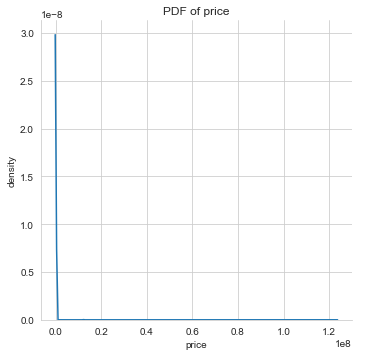

In [33]:
sns.set_style("whitegrid") #setting style as whitegrid 
sns.FacetGrid(df1,height=5) \
   .map(sns.kdeplot, "price") \
   .add_legend();
plt.ylabel('density')
plt.title('PDF of price')
plt.show()

In [34]:
print('No. of Cars having prices above 1000k $:-', len(df1[df1['price']>=1000000]))
print('No. of Cars having prices above 150k $:-', len(df1[df1['price']>=150000]))
print('No. of Cars having prices below 1000 $:-', len(df1[df1['price']<=1000]))
print('No. of Cars having prices below 500 $:-', len(df1[df1['price']<=500]))
print('No. of Cars having prices below 100 $:-', len(df1[df1['price']<=100]))
print('No. of Cars having priced $0 :-', len(df1[df1['price']==0]))

No. of Cars having prices above 1000k $:- 5
No. of Cars having prices above 150k $:- 21
No. of Cars having prices below 1000 $:- 5504
No. of Cars having prices below 500 $:- 4997
No. of Cars having prices below 100 $:- 4240
No. of Cars having priced $0 :- 3837


From the above PDF of the price, we can observe that the data is right skewed and there are a lot of cars which are priced very low and some very high. This could be due to the discrepancy in collecting data

In [35]:
#this function will plot the countplot for a particular feature
def plot_countplot(feature,size):
    plt.figure(figsize=size)#defining figsize
    ax=sns.countplot(x=feature,data=df1)#plotting countplot for a given feature
    ax.bar_label(ax.containers[0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)#rotating and setting the font size of x labels
    plt.title("No. of cars by {}".format(feature))#title for a figure
    plt.ylabel('No. of cars')#y label for a figure
    plt.show()

In [36]:
df1["title_status"].value_counts()/len(df1)

clean         0.949555
rebuilt       0.016680
salvage       0.008594
lien          0.003433
missing       0.001442
parts only    0.000386
Name: title_status, dtype: float64

In [37]:
df1.region.isnull().sum()

0

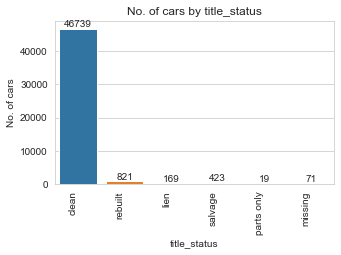

In [38]:
plot_countplot('title_status',(5,3))

By the above plot we can say that all most all cars are listed as clean and there are very few with others status

In [39]:
(df1["condition"].value_counts()/len(df1))*100

good         28.893584
excellent    23.556540
like new      4.924627
fair          1.590752
new           0.292552
salvage       0.154403
Name: condition, dtype: float64

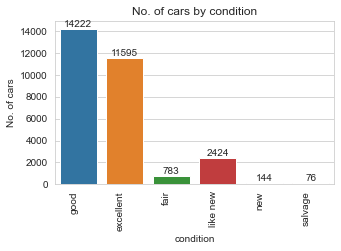

In [40]:
plot_countplot('condition',(5,3))

The above is the distribution of condition of the cars among the listed. most of the cars are in good and excellent condition

In [41]:
(df1["fuel"].value_counts()/len(df1))*100

gas         83.598797
other        7.126894
diesel       6.929828
hybrid       1.182398
electric     0.422575
Name: fuel, dtype: float64

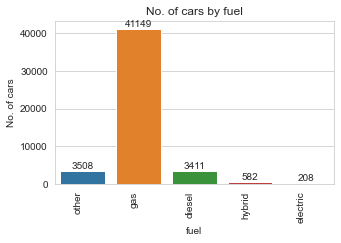

In [42]:
plot_countplot("fuel",(5,3))

The majority of the cars are powered by gas. we can infer that people in US prefer gas driven cars.

In [43]:
(df1["cylinders"].value_counts()/df1.cylinders.value_counts().sum())*100

6 cylinders     38.098706
4 cylinders     30.804980
8 cylinders     28.959872
10 cylinders     0.693650
5 cylinders      0.634689
other            0.482086
3 cylinders      0.256650
12 cylinders     0.069365
Name: cylinders, dtype: float64

No.of Null values:  20389
Percenage of Null values:  41.42253463898257


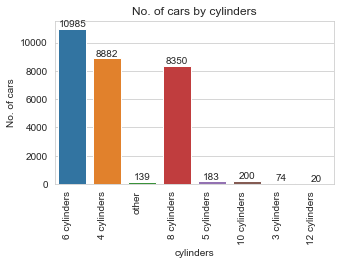

In [44]:
print("No.of Null values: ",df1.cylinders.isnull().sum())
print("Percenage of Null values: ",(df1.cylinders.isnull().sum()/len(df1))*100)
plot_countplot("cylinders",(5,3))


In [45]:
for i in range(len(df1.cylinders.value_counts()-1)):
    temp = (df1.cylinders.value_counts()[i]/df1.cylinders.value_counts().sum())*100
    print(df1.cylinders.value_counts().index[i], temp)

6 cylinders 38.09870634342594
4 cylinders 30.804980404397735
8 cylinders 28.959872368466687
10 cylinders 0.6936496375680644
5 cylinders 0.6346894183747789
other 0.48208649810980475
3 cylinders 0.2566503659001838
12 cylinders 0.06936496375680644


Around 40% of the cylinders feature have null values and the distribution in the remaining 60% data of the cylinders is as above.
we can infer that majority of the US people use cars with 4 and 6 cylinders

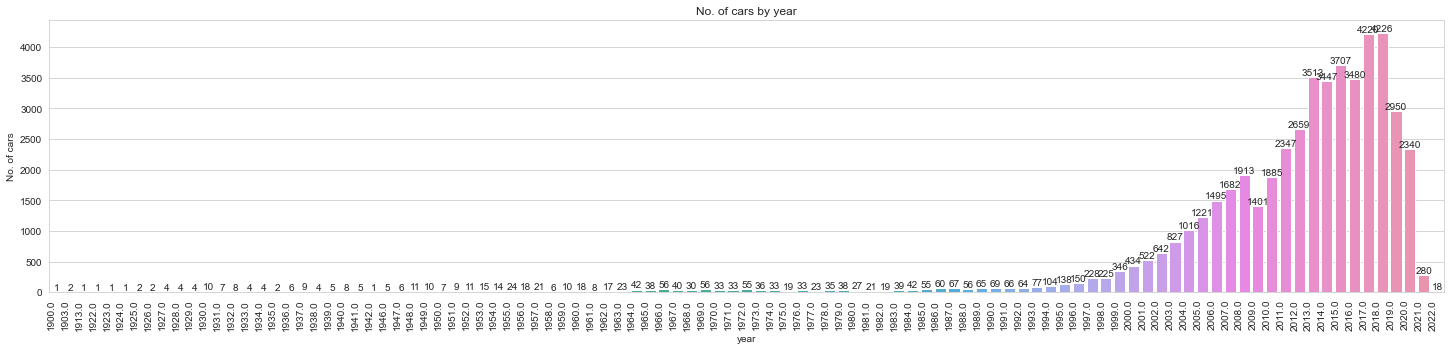

In [46]:
plot_countplot("year",(25,5))

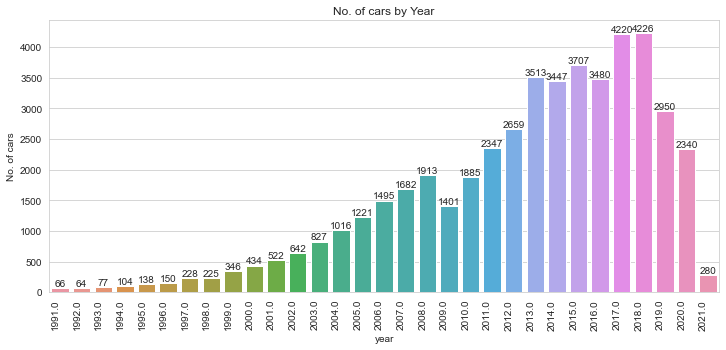

In [47]:
plt.figure(figsize=(12,5))#defining figsize
ax=sns.countplot(x="year",data=df1[df1.year.apply(lambda x: (x > 1990) and (x < 2022))])#plotting countplot for a given feature
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)#rotating and setting the font size of x labels
plt.title("No. of cars by {}".format("Year"))#title for a figure
plt.ylabel('No. of cars')#y label for a figure
plt.show()

The above both graphs show the distribution of cars and their manufacture year. In the 2nd graph we are only considering the cars of 30 years-32 years old. we can see that there is increasing trend in the used car sales. And the sales have been reducing from 2019 to 2021. This could be because of Covid 19 or other factors.

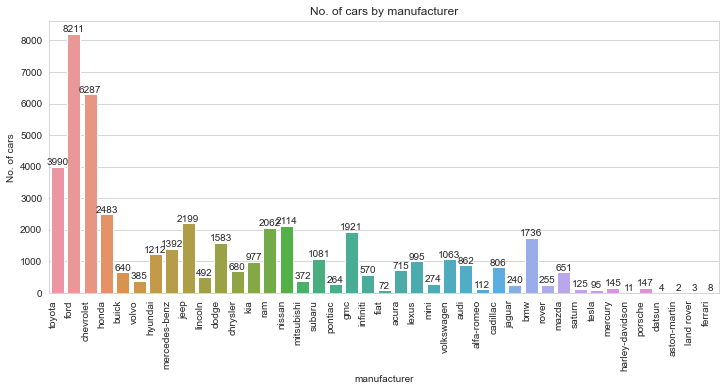

In [48]:
plot_countplot("manufacturer", (12,5))

From the above graphs, we can observe that Ford and Cheverlot (Big american brands) are most sold cars for seconds. Then we have (japanese brands) toyota, honda, nissan etcs.,

In [49]:
(df1["type"].value_counts()/len(df1))*100

sedan          20.429889
SUV            18.048840
pickup         10.261672
truck           8.240218
other           5.288286
coupe           4.569095
hatchback       3.959612
wagon           2.513104
van             2.045833
convertible     1.928000
mini-van        1.131608
offroad         0.150339
bus             0.127992
Name: type, dtype: float64

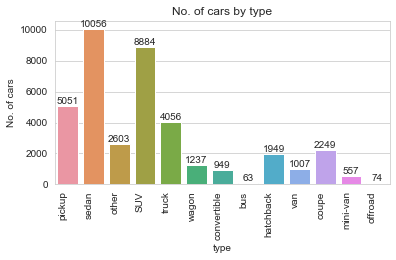

In [50]:
plot_countplot('type', (6,3))

Mostly sedans and SUVs have good 2nd hand market.

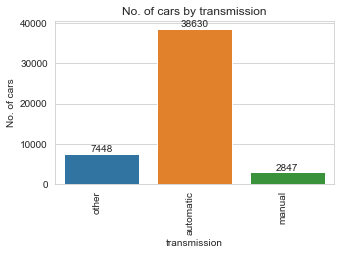

In [51]:
plot_countplot('transmission', (5,3))

Almost 80% of these cars are automatic transmission cars

In [52]:
(df1.drive.value_counts()/len(df1))*100

4wd    31.002397
fwd    24.505303
rwd    13.894194
Name: drive, dtype: float64

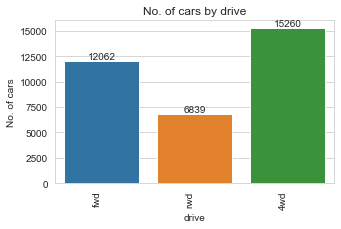

In [53]:
plot_countplot('drive',(5,3))

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49222 entries, 0 to 50000
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           49222 non-null  object 
 1   price            49222 non-null  int64  
 2   year             49072 non-null  float64
 3   manufacturer     47236 non-null  object 
 4   condition        29244 non-null  object 
 5   cylinders        28833 non-null  object 
 6   fuel             48858 non-null  object 
 7   odometer         48711 non-null  float64
 8   title_status     48242 non-null  object 
 9   transmission     48925 non-null  object 
 10  drive            34161 non-null  object 
 11  type             38735 non-null  object 
 12  paint_color      34176 non-null  object 
 13  description      49217 non-null  object 
 14  image_available  49222 non-null  int32  
 15  desc_available   49222 non-null  int32  
 16  Age              49072 non-null  float64
dtypes: float64(3

## Relation of features with the Target Variables:

In [55]:
from numpy import mean, median
def barplot(feature,data,size,show_label = True, rotate=False, estimator = mean):
    plt.figure(figsize=size)
    ax=sns.barplot(x=feature,data=data,y='price', estimator = estimator)
    if show_label:
        ax.bar_label(ax.containers[0])
    if rotate==True:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
    plt.title("{} vs Price".format(feature))
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

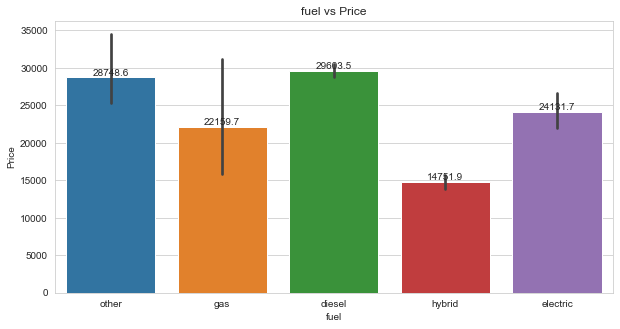

In [56]:
barplot('fuel',df1, (10,5))

In [57]:
df1["price"][df1.fuel == "diesel"].describe()

count      3411.000000
mean      29603.474934
std       24231.807523
min           0.000000
25%       11000.000000
50%       27990.000000
75%       43999.000000
max      470000.000000
Name: price, dtype: float64

In [58]:
df1["price"][df1.fuel == "electric"].describe()

count      208.000000
mean     24131.653846
std      17571.068258
min          0.000000
25%      11441.250000
50%      19990.000000
75%      36590.000000
max      94890.000000
Name: price, dtype: float64

In [59]:
df1["price"][df1.fuel == "gas"].describe()

count    4.114900e+04
mean     2.215975e+04
std      8.628358e+05
min      0.000000e+00
25%      5.495000e+03
50%      1.200000e+04
75%      2.399000e+04
max      1.234568e+08
Name: price, dtype: float64

Text(0.5, 1.0, 'fuel vs Price')

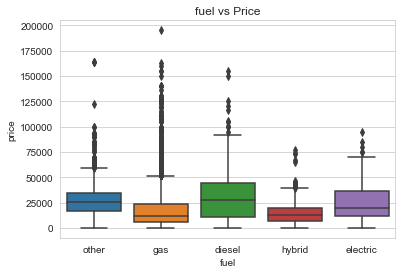

In [60]:
sns.boxplot(x="fuel", y="price",data=df1[df1['price']<200000])
plt.title("{} vs Price".format("fuel"))

75% of the gas fuel type cars are under 23k USD while 75% of the diesel fuel type cars are under 45K USD. On an average Diesel cars are costlier in the market where as hybrid and gas cars have average low price.

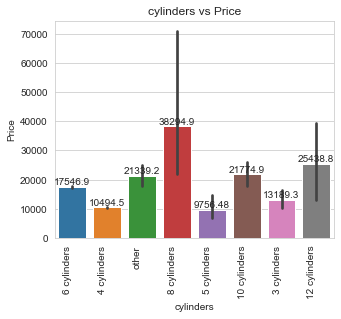

In [61]:
barplot('cylinders',df1,(5,4), rotate=True)

12 cylinder cars are expensive when compared to the other ones on an average. it is as expected because with the increase of the number of cylinders, the power of the engine increases so does the cost

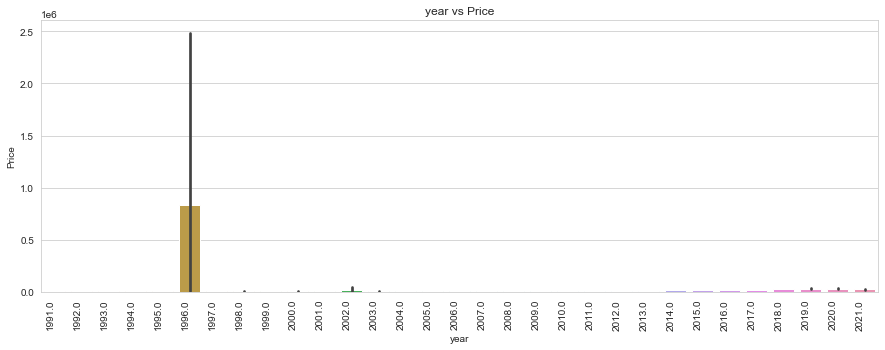

In [62]:
barplot('year',df1[df1.year.apply(lambda x: (x > 1990) and (x < 2022))],(15,5),False, True)

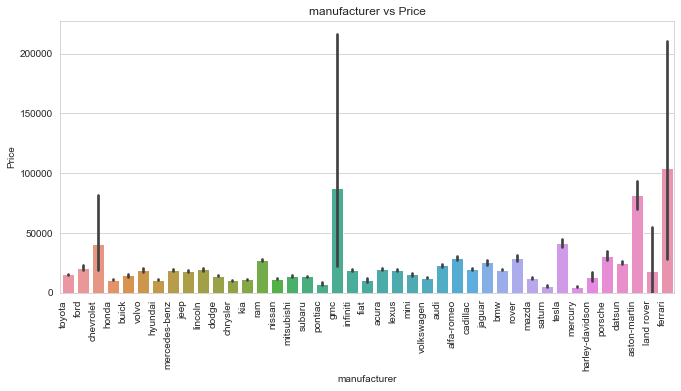

In [63]:
barplot('manufacturer',df1,(11,5),False, True)

Ferari cars are the expensive followed by aston-martin, Tesla, Porsche, satum etc

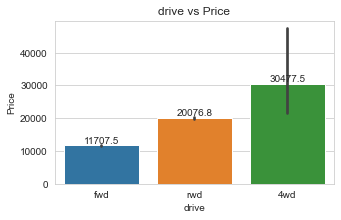

In [64]:
barplot('drive', df1, (5,3))

the 4 wheel drive cars are expensive compared to other drives

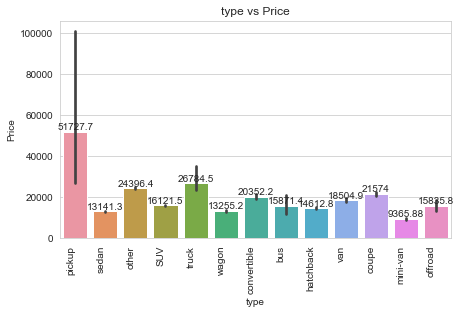

In [65]:
barplot('type', df1, (7,4), rotate=True)

pickup, other are the costliest vehicle while mini-van, sedan are the cheapest

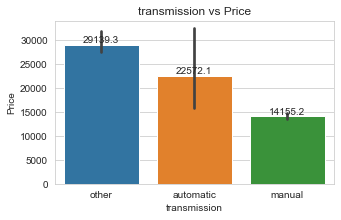

In [66]:
barplot('transmission', df1, (5,3))

The other transmission type has the highest average price than automatic and manual ones

In [67]:
sample_df = df1.dropna()

In [68]:
print(sample_df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13476 entries, 7 to 49991
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           13476 non-null  object 
 1   price            13476 non-null  int64  
 2   year             13476 non-null  float64
 3   manufacturer     13476 non-null  object 
 4   condition        13476 non-null  object 
 5   cylinders        13476 non-null  object 
 6   fuel             13476 non-null  object 
 7   odometer         13476 non-null  float64
 8   title_status     13476 non-null  object 
 9   transmission     13476 non-null  object 
 10  drive            13476 non-null  object 
 11  type             13476 non-null  object 
 12  paint_color      13476 non-null  object 
 13  description      13476 non-null  object 
 14  image_available  13476 non-null  int32  
 15  desc_available   13476 non-null  int32  
 16  Age              13476 non-null  float64
dtypes: float64(3

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

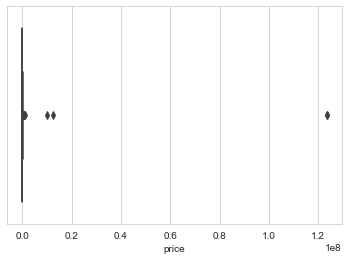

In [69]:
sns.boxplot(df1.price)

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

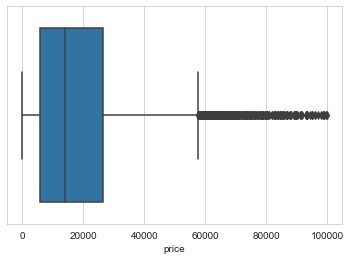

In [70]:
sns.boxplot(df1[df1.price<100000]['price'])

Clearly we can see the outliers of prices which might affect our model a lot. the median is somewhere around 12K USD. we have to deal with the outliers to train a reliable model.

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

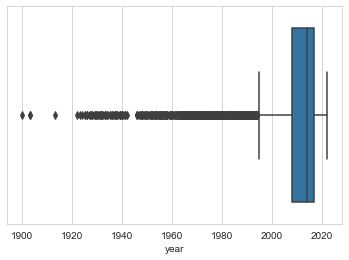

In [71]:
sns.boxplot(df1.year)

similarly, we have very old cars which does not contribute the training of the model as some old antique cars might have very price or unexpected prices. we only consider cars from year 1990. The mdeian is somewhere close to 2015.

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

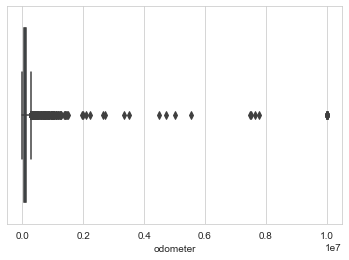

In [72]:
sns.boxplot(df1.odometer)

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

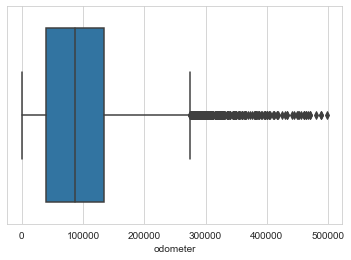

In [73]:
sns.boxplot(df1[(df1.odometer > 1000) & (df1.odometer < 500000)]["odometer"])


In [74]:
def clean_data(data):
    '''This function will do all the data cleaning and removal of outliers'''
    
    data=data[data['year']<2021]#data was scraped from craiglist in year 2021 and manufacturing year cant be 2022
    data=data[data.price<=100000]#removing car priced above 0.1 million dollars 
    data=data[data.year>1990]#removing cars aged above 70
    data=data[data.odometer!=0]#removing records where odometer value is 0
    '''Dropping cars with price less than 1000 and miles less than 60,000 and model age greater than 10'''
    data.drop(data[(data.price < 1000 ) & (data.odometer < 60000 ) & (data.year <2010)].index, inplace = True)
    data.drop(data[(data.price < 200)].index, inplace = True)#dropping cars priced under 200$
    data.drop(data[data.odometer>=500000].index, inplace = True)#removing cars where it has driven more than 0.5 million miles 
    return data

In [75]:
## before appling this function on our dataframe. just making of a copy of df1 into cars_df1 and applying the above function

cars_df1 = df1.copy()
cleaned_df1 = clean_data(df1)

In [76]:
cleaned_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42845 entries, 0 to 50000
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           42845 non-null  object 
 1   price            42845 non-null  int64  
 2   year             42845 non-null  float64
 3   manufacturer     41536 non-null  object 
 4   condition        26631 non-null  object 
 5   cylinders        25314 non-null  object 
 6   fuel             42571 non-null  object 
 7   odometer         42587 non-null  float64
 8   title_status     42036 non-null  object 
 9   transmission     42656 non-null  object 
 10  drive            29915 non-null  object 
 11  type             34099 non-null  object 
 12  paint_color      30369 non-null  object 
 13  description      42845 non-null  object 
 14  image_available  42845 non-null  int32  
 15  desc_available   42845 non-null  int32  
 16  Age              42845 non-null  float64
dtypes: float64(3

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49222 entries, 0 to 50000
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           49222 non-null  object 
 1   price            49222 non-null  int64  
 2   year             49072 non-null  float64
 3   manufacturer     47236 non-null  object 
 4   condition        29244 non-null  object 
 5   cylinders        28833 non-null  object 
 6   fuel             48858 non-null  object 
 7   odometer         48711 non-null  float64
 8   title_status     48242 non-null  object 
 9   transmission     48925 non-null  object 
 10  drive            34161 non-null  object 
 11  type             38735 non-null  object 
 12  paint_color      34176 non-null  object 
 13  description      49217 non-null  object 
 14  image_available  49222 non-null  int32  
 15  desc_available   49222 non-null  int32  
 16  Age              49072 non-null  float64
dtypes: float64(3

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 19076.78674291049 and sigma = 14295.754658268246


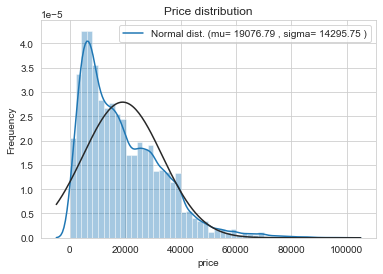

In [78]:
(mu, sigma) = norm.fit(cleaned_df1['price'])

# 1. Plot Price
sns.distplot(cleaned_df1['price'], fit=norm) # displot is to plot the distribution
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend(['Normal dist. (mu= {:.2f} , sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu = {} and sigma = {}'.format(mu, sigma))

In [79]:
from scipy import stats
from scipy.stats import boxcox

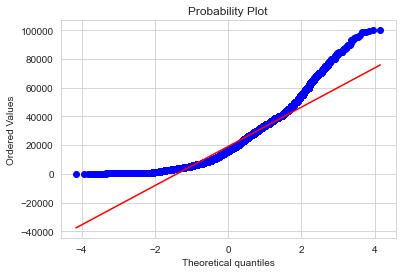

In [80]:
fig = plt.figure()
res = stats.probplot(cleaned_df1['price'],plot = plt)
plt.show()

the above distribution shows the price distribution with a mean of 19010 USD and standard deviation of 14241 USD. and this is skewed to the right. we can observe a lot of curvature in the To normalise the price, we use Box-Cox transformation

## Applying Box-Cox transformation to normalize the price distribution

In [ ]:
from scipy.special import boxcox1p,inv_boxcox1p
from scipy.special import inv_boxcox
from scipy.stats import boxcox

In [81]:
#applying box-cox transformation to remove skewness and converting it to normal distribution
price_box,lam_price= boxcox(cleaned_df1['price'])
price_box

array([117.14825203, 123.79205217, 109.4926873 , ..., 110.92720336,
       101.77963924, 113.15814474])

In [82]:
lam_price

0.3617252071035923

In [83]:
cleaned_df1["price_norm"] = price_box

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu_boxcox = 88.09 and sigma_boxcox = 27.60


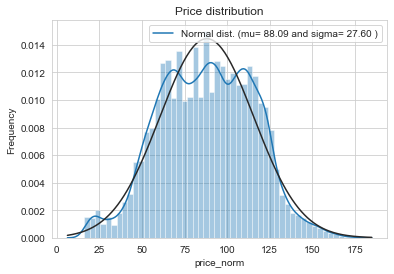

In [84]:
(mu, sigma) = norm.fit(cleaned_df1['price_norm'])

# 1. Plot Price
sns.distplot(cleaned_df1['price_norm'], fit=norm);
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu_boxcox = {:.2f} and sigma_boxcox = {:.2f}'.format(mu, sigma))

<ipython-input-85-65b099523494>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


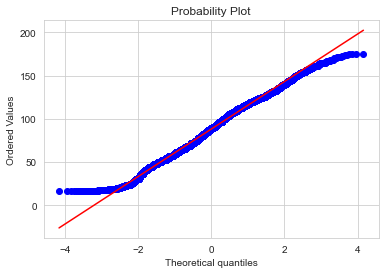

In [85]:
fig = plt.figure()
res = stats.probplot(cleaned_df1["price_norm"], plot = plt)
fig.show()

Now the price distribution is normalise and the from the probability plot we can observe more points along the theoritical reference line.

### Handling Missing values

imputation of missing values in the numerical  type columns using IterativeImputer.


In [86]:
cleaned_df1.isnull().sum()

region                 0
price                  0
year                   0
manufacturer        1309
condition          16214
cylinders          17531
fuel                 274
odometer             258
title_status         809
transmission         189
drive              12930
type                8746
paint_color        12476
description            0
image_available        0
desc_available         0
Age                    0
price_norm             0
dtype: int64

In [87]:
cleaned_df1.odometer.isnull().sum()

258

<AxesSubplot:ylabel='Density'>

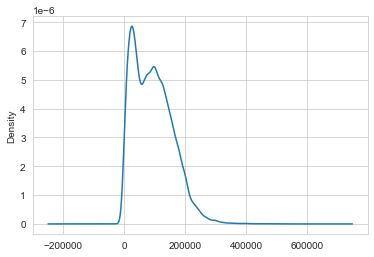

In [88]:
cleaned_df1["odometer"].plot.density()

In [89]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [90]:
def imputation_numeric(numeric, regressor):
    '''this function will compute missing values for numerical type feature'''
    imp_numeric = IterativeImputer(regressor)
    imputed = imp_numeric.fit_transform(numeric)
    numeric_imp = pd.DataFrame(imputed, columns = numeric.columns, index= numeric.index)
    return numeric_imp

In [91]:
gbr = GradientBoostingRegressor()
#abr = AdaBoostRegressor()
#rfr = RandomForestRegressor()
numeric_col = ["odometer"]

In [92]:
odometer_col1 = imputation_numeric(cleaned_df1[numeric_col],gbr)
cleaned_df1["odometer"] = odometer_col1
cleaned_df1["odometer"]

0         55251.0
1         12231.0
2         22120.0
3         28942.0
4            21.0
           ...   
49995     63200.0
49996    154917.0
49998     16841.0
49999      3066.0
50000     22716.0
Name: odometer, Length: 42845, dtype: float64

In [93]:
s_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
odometer_col2 = s_imp.fit_transform(cleaned_df1[numeric_col])
odometer_col2

array([[55251.],
       [12231.],
       [22120.],
       ...,
       [16841.],
       [ 3066.],
       [22716.]])

We are taking the imputed values from the Iterative imputer.

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 mu_box = 93533.45 and sigma_box = 63697.04


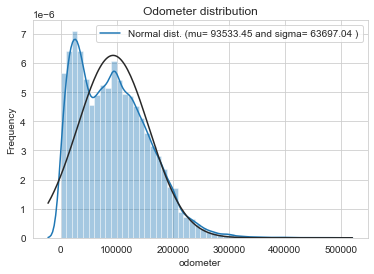

In [94]:
(mu, sigma) = norm.fit(cleaned_df1['odometer'])

# 1. Plot Odometer
sns.distplot(cleaned_df1['odometer'],fit=norm);
plt.ylabel('Frequency')
plt.title('Odometer distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( ' mu_box = {:.2f} and sigma_box = {:.2f}'.format(mu, sigma))

In [95]:
odo_box,lam_odo = boxcox(cleaned_df1['odometer'])
cleaned_df1['odometer'] = odo_box

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 mu_box = 580.23 and sigma_box = 232.42


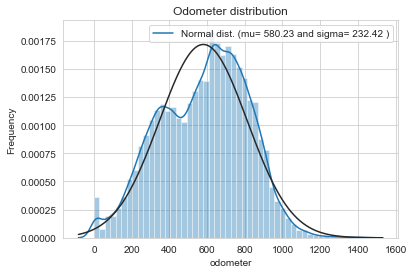

In [96]:
(mu, sigma) = norm.fit(cleaned_df1['odometer'])

# 1. Plot Odometer
sns.distplot(cleaned_df1['odometer'],fit=norm);
plt.ylabel('Frequency')
plt.title('Odometer distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( ' mu_box = {:.2f} and sigma_box = {:.2f}'.format(mu, sigma))

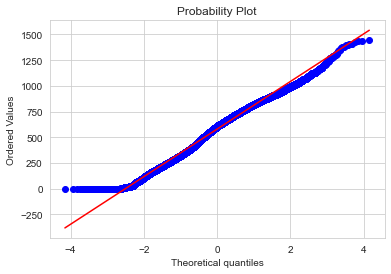

In [97]:
fig = plt.figure()
res = stats.probplot(cleaned_df1["odometer"], plot=plt)
plt.show()

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 mu_box = 9.68 and sigma_box = 5.75


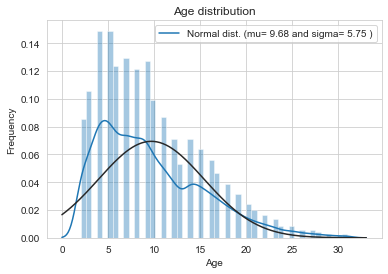

In [98]:
(mu, sigma) = norm.fit(cleaned_df1['Age'])

# 1. Plot Odometer
sns.distplot(cleaned_df1['Age'],fit=norm);
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( ' mu_box = {:.2f} and sigma_box = {:.2f}'.format(mu, sigma))

In [99]:
odo_box,lam_odo = boxcox(cleaned_df1['Age'])
cleaned_df1['Age'] = odo_box

C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 mu_box = 1.62 and sigma_box = 0.92


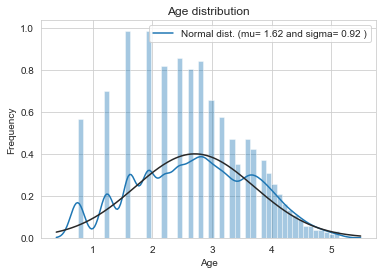

In [100]:
(mu, sigma) = norm.fit(boxcox(cleaned_df1['Age'])[0])

# 1. Plot Odometer
sns.distplot(cleaned_df1['Age'],fit=norm);
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( ' mu_box = {:.2f} and sigma_box = {:.2f}'.format(mu, sigma))

### Handling Missing values for Categorical features

In [101]:
temp_cols = cleaned_df1.columns
column_null = cleaned_df1.isnull().sum()

In [102]:

print("Feature \t \t percentage of Null values")
for i in range(len(temp_cols)):
    print('{} \t \t {} % '.format(temp_cols[i],(column_null[i]/cleaned_df1.shape[0])*100))
    # print('*'*10)

Feature 	 	 percentage of Null values
region 	 	 0.0 % 
price 	 	 0.0 % 
year 	 	 0.0 % 
manufacturer 	 	 3.055198973042362 % 
condition 	 	 37.843388960205395 % 
cylinders 	 	 40.917259890302255 % 
fuel 	 	 0.639514529116583 % 
odometer 	 	 0.0 % 
title_status 	 	 1.8882016571361886 % 
transmission 	 	 0.44112498541253353 % 
drive 	 	 30.178550589333646 % 
type 	 	 20.413117049830785 % 
paint_color 	 	 29.118917026490838 % 
description 	 	 0.0 % 
image_available 	 	 0.0 % 
desc_available 	 	 0.0 % 
Age 	 	 0.0 % 
price_norm 	 	 0.0 % 


First let's fill condition feature as by domain knowledge we know condition of car depends on it's ,how old it is so both this information can be fed from year and odometer values.

we can fill cars with year 2020 as 'new' and for year 2018-2019 like new and for years less than 2018 we can fill with respect to odometer values as odometer can give the idea how much car has driven

In [103]:
cleaned_df1.loc[(cleaned_df1.year >= 2018) & (cleaned_df1.year <= 2019), "condition"].isnull().sum()

2368

In [104]:
cleaned_df1.loc[(cleaned_df1.year >= 2018) & (cleaned_df1.year <= 2019), "condition"] = cleaned_df1.loc[(cleaned_df1.year >= 2018) & (cleaned_df1.year <= 2019), "condition"].fillna("like new")

In [105]:
cleaned_df1.loc[cleaned_df1.year>2019,'condition'].isnull().sum()

628

In [106]:
cleaned_df1.loc[cleaned_df1.year>2019,'condition'] = cleaned_df1.loc[cleaned_df1.year>2019,'condition'].fillna("new")

In [107]:
excellent_odo_median = cleaned_df1[cleaned_df1['condition'] == 'excellent']['odometer'].median()
good_odo_median = cleaned_df1[cleaned_df1['condition'] == 'good']['odometer'].median()
like_new_odo_median = cleaned_df1[cleaned_df1['condition'] == 'like new']['odometer'].median()
salvage_odo_median = cleaned_df1[cleaned_df1['condition'] == 'salvage']['odometer'].median()
fair_odo_median = cleaned_df1[cleaned_df1['condition'] == 'fair']['odometer'].median()

print('Excellent average odometer:',excellent_odo_median)
print('Good average odometer:',good_odo_median)
print('Like new average odometer:',like_new_odo_median)
print('Salvage average odometer:',salvage_odo_median)
print('Fair average odometer:',fair_odo_median)


Excellent average odometer: 662.0065229768835
Good average odometer: 454.14819856247726
Like new average odometer: 415.9743526443226
Salvage average odometer: 787.189281832998
Fair average odometer: 868.5751615615454


1)From this we can assume if odometer values is less than 41916 it would be like_new

2)if it would be greater than 180000 than it should be considered as fair as it is the highest.

3)good can be filled where it is greater than like_new and less than excellent

4)Excellent can be filled where it is greater than good and less than salvage.

5)Salvage can be filled where it is greater than excellent and less than fair

In [108]:
cleaned_df1.loc[cleaned_df1['odometer']<like_new_odo_median,'condition']=cleaned_df1.loc[cleaned_df1['odometer']<like_new_odo_median,'condition'].fillna('like new')
cleaned_df1.loc[cleaned_df1['odometer']>=fair_odo_median,'condition']=cleaned_df1.loc[cleaned_df1['odometer']>=fair_odo_median,'condition'].fillna('fair')
cleaned_df1.loc[(cleaned_df1['odometer']>like_new_odo_median) & (cleaned_df1['odometer']<excellent_odo_median),'condition']=cleaned_df1.loc[(cleaned_df1['odometer']>like_new_odo_median) & (cleaned_df1['odometer']<excellent_odo_median),'condition'].fillna('good')
cleaned_df1.loc[(cleaned_df1['odometer']>good_odo_median) & (cleaned_df1['odometer']<salvage_odo_median),'condition']=cleaned_df1.loc[(cleaned_df1['odometer']>good_odo_median) & (cleaned_df1['odometer']<salvage_odo_median),'condition'].fillna('excellent')
cleaned_df1.loc[(cleaned_df1['odometer']>excellent_odo_median) & (cleaned_df1['odometer']<fair_odo_median),'condition']=cleaned_df1.loc[(cleaned_df1['odometer']>excellent_odo_median) & (cleaned_df1['odometer']<fair_odo_median),'condition'].fillna('salvage')


Cylinder column can be filled using its manufacture. from the phik_matrix we can observe cylinder column is 0.68 correlated with the manufacture. 

electric cars have 0 cylinders

In [109]:
## filling cylinders = 0 if its an electric car
cleaned_df1.loc[cleaned_df1.fuel == 'electric', 'cylinders'] = '0 cylinders'

we will check if description contains information about no. of cylinders.

In [110]:
cleaned_df1["description"]

0        Carvana is the safer way to buy a car During t...
1        Carvana is the safer way to buy a car During t...
2        Carvana is the safer way to buy a car During t...
3        Carvana is the safer way to buy a car During t...
4        Carvana is the safer way to buy a car During t...
                               ...                        
49995    2012 Chevrolet, Chevy Sonic 1LT Sedan ☎ 406-28...
49996    2005 Nissan Altima 2.5 SL ☎ 406-283-3311 Call ...
49998    Carvana is the safer way to buy a car During t...
49999    Carvana is the safer way to buy a car During t...
50000    Carvana is the safer way to buy a car During t...
Name: description, Length: 42845, dtype: object

In [111]:
cleaned_df1["description"] = cleaned_df1["description"].apply(lambda x: str(x).lower())
cleaned_df1["description"]


0        carvana is the safer way to buy a car during t...
1        carvana is the safer way to buy a car during t...
2        carvana is the safer way to buy a car during t...
3        carvana is the safer way to buy a car during t...
4        carvana is the safer way to buy a car during t...
                               ...                        
49995    2012 chevrolet, chevy sonic 1lt sedan ☎ 406-28...
49996    2005 nissan altima 2.5 sl ☎ 406-283-3311 call ...
49998    carvana is the safer way to buy a car during t...
49999    carvana is the safer way to buy a car during t...
50000    carvana is the safer way to buy a car during t...
Name: description, Length: 42845, dtype: object

In [112]:
len(cleaned_df1.loc[(cleaned_df1['description'].str.contains('3 cylinders'))])

5

In [113]:
len(cleaned_df1.loc[(cleaned_df1['description'].str.contains('3 cylinders')) |
                   (cleaned_df1['description'].str.contains('3 Cylinders')) |
                   (cleaned_df1['description'].str.contains('3 CYLINDERS'))])

5

In [114]:
cleaned_df1.loc[(cleaned_df1['description'].str.contains('3 cylinders')),"cylinders"] = '3 cylinders'
cleaned_df1.loc[(cleaned_df1['description'].str.contains('4 cylinders')),"cylinders"] = '4 cylinders'
cleaned_df1.loc[(cleaned_df1['description'].str.contains('5 cylinders')),"cylinders"] = '5 cylinders'
cleaned_df1.loc[(cleaned_df1['description'].str.contains('6 cylinders')),"cylinders"] = '6 cylinders'
cleaned_df1.loc[(cleaned_df1['description'].str.contains('8 cylinders')),"cylinders"] = '8 cylinders'
cleaned_df1.loc[(cleaned_df1['description'].str.contains('10 cylinders')),"cylinders"] = '10 cylinders'
cleaned_df1.loc[(cleaned_df1['description'].str.contains('12 cylinders')),"cylinders"] = '12 cylinders'
cleaned_df1.loc[cleaned_df1.cylinders=='other','cylinders']='0 cylinders'

In [115]:
cleaned_df1.loc[cleaned_df1["cylinders"].isnull(),"manufacturer"].value_counts()

ford               2813
chevrolet          1935
toyota             1233
honda               810
bmw                 789
ram                 699
nissan              679
jeep                653
gmc                 580
dodge               478
hyundai             474
mercedes-benz       464
volkswagen          446
subaru              424
kia                 413
audi                376
cadillac            355
lexus               340
acura               312
mazda               292
buick               260
chrysler            214
volvo               206
lincoln             198
mitsubishi          189
infiniti            182
jaguar              144
mini                136
rover               103
alfa-romeo           93
pontiac              70
saturn               54
porsche              39
fiat                 33
mercury              28
tesla                16
harley-davidson       7
ferrari               1
Name: manufacturer, dtype: int64

In [116]:
cleaned_df1["manufacturer"].isnull().sum()

1309

In [117]:
cleaned_df1['manufacturer']=cleaned_df1['manufacturer'].fillna('ford')#'ford is the mode
cleaned_df1["manufacturer"].isnull().sum()


0

filling all the cylinder columns of nulls with the mode of the cylinders of each manufacture. if the mode is 0 or empty with '6 cylinders'

In [118]:
 cleaned_df1["cylinders"]= cleaned_df1.groupby('manufacturer')['cylinders'].transform(lambda x: x.fillna(x.mode()[0]) if x.mode().empty==False else x.fillna('6 cylinders'))

Similarly filling the null values in drive and type by grouping by manufacturer. as they are highly correlated with the manufacturer.

In [119]:
cleaned_df1["drive"] = cleaned_df1.groupby("manufacturer")["drive"].transform(lambda x: x.fillna(x.mode()[0]) if x.mode().empty == False else x.fillna("4wd"))

In [120]:
cleaned_df1['type']=cleaned_df1.groupby('drive')['type'].transform(lambda x: x.fillna(x.mode()[0]) if x.mode().empty==False else x.fillna('sedan'))

filling all other features with mode

In [121]:
cleaned_df1.loc[cleaned_df1.fuel == 'electric', 'transmission'] = 'automatic'
cleaned_df1.loc[(cleaned_df1['description'].str.contains('automatic transmission')) & (cleaned_df1['transmission'].isna()), "transmission"] = "automatic"
cleaned_df1.loc[(cleaned_df1['description'].str.contains('manual transmission')) & (cleaned_df1['transmission'].isna()), "transmission"] = "manual"

In [122]:
cleaned_df1['transmission'] = cleaned_df1['transmission'].fillna('automatic')
cleaned_df1['title_status'] = cleaned_df1['title_status'].fillna('clean')
cleaned_df1['fuel'] = cleaned_df1['fuel'].fillna('gas')
cleaned_df1['paint_color'] = cleaned_df1['paint_color'].fillna('white')

In [123]:
cleaned_df1.isnull().sum() 

region             0
price              0
year               0
manufacturer       0
condition          0
cylinders          0
fuel               0
odometer           0
title_status       0
transmission       0
drive              0
type               0
paint_color        0
description        0
image_available    0
desc_available     0
Age                0
price_norm         0
dtype: int64

Creating a column Average odometer rating per year

In [124]:
cleaned_df1["avg_odo_year"] = cleaned_df1["odometer"]/cleaned_df1["Age"]

In [125]:
cleaned_df1["odometer_sq"] = np.square(cleaned_df1["odometer"])
cleaned_df1[["odometer_sq","odometer"]]

,odometer_sq,odometer
0,229332.525490,478.886756
1,49907.251073,223.399309
2,90945.792626,301.572201
3,119355.467752,345.478607
4,51.835489,7.199687
...,...,...
49995,262648.256901,512.492202
49996,648566.922418,805.336527
49998,69011.649061,262.700683
49999,12201.675852,110.461196


In [126]:
cleaned_df1["age_sq"]= np.square(cleaned_df1["Age"])
cleaned_df1[["age_sq","Age"]]

,age_sq,Age
0,6.957384,2.637685
1,0.560813,0.748874
2,3.731572,1.931728
3,2.628638,1.621307
4,0.560813,0.748874
...,...,...
49995,8.995936,2.999323
49996,15.477760,3.934178
49998,2.628638,1.621307
49999,0.560813,0.748874


In [127]:
cleaned_df1.columns
columns = ["price", "Age", "cylinders","odometer","avg_odo_year", "odometer_sq","age_sq"]

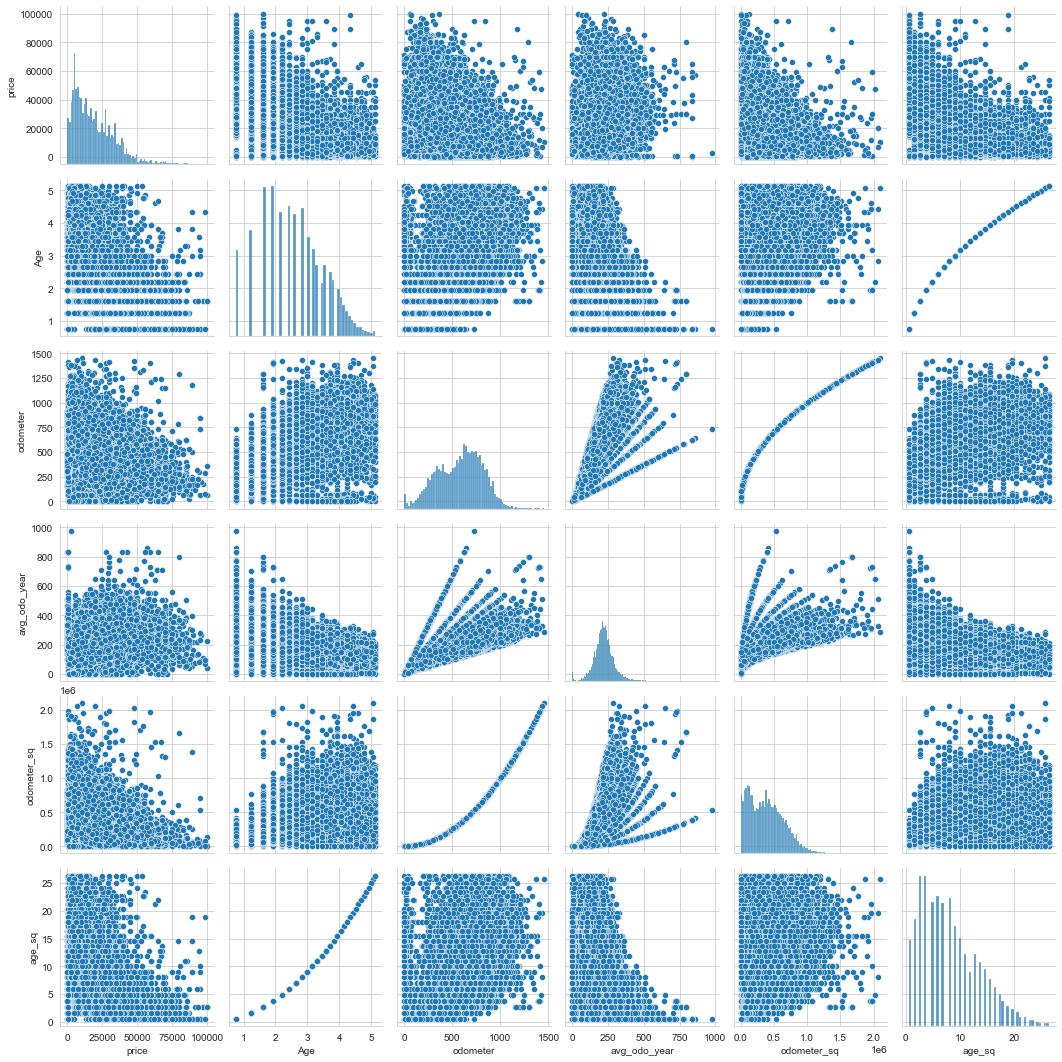

In [128]:
sns.pairplot(cleaned_df1[columns])

In [129]:
Corr_mat1 = cleaned_df1.drop(columns = ["description", "year", "price_norm"]).phik_matrix()

interval columns not set, guessing: ['price', 'odometer', 'image_available', 'desc_available', 'Age', 'avg_odo_year', 'odometer_sq', 'age_sq']


C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable image_available for analysis 1. Dropping this column
  warnings.warn(
C:\Users\dimpu\AppData\Local\Programs\Python\Python38\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable desc_available for analysis 1. Dropping this column
  warnings.warn(


In [130]:
Corr_mat1

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,Age,avg_odo_year,odometer_sq,age_sq
region,1.000000,0.343233,0.363652,0.372097,0.253333,0.264122,0.293318,0.230271,0.447805,0.354686,0.366179,0.231108,0.285935,0.208795,0.264653,0.274488
price,0.343233,1.000000,0.407643,0.376407,0.258049,0.429526,0.595275,0.083697,0.447666,0.356287,0.333458,0.118388,0.649775,0.282403,0.578091,0.640503
manufacturer,0.363652,0.407643,1.000000,0.206575,0.829233,0.620776,0.269604,0.078491,0.377824,0.829362,0.665118,0.254383,0.304445,0.240730,0.237956,0.278936
condition,0.372097,0.376407,0.206575,1.000000,0.117666,0.175250,0.618992,0.089610,0.628668,0.224389,0.235202,0.173665,0.554020,0.295725,0.611115,0.433425
cylinders,0.253333,0.258049,0.829233,0.117666,1.000000,0.601240,0.106321,0.044008,0.160141,0.502461,0.420848,0.148163,0.112896,0.114294,0.106003,0.124342
fuel,0.264122,0.429526,0.620776,0.175250,0.601240,1.000000,0.316538,0.039813,0.325576,0.200064,0.366865,0.125975,0.257326,0.182873,0.308861,0.249597
odometer,0.293318,0.595275,0.269604,0.618992,0.106321,0.316538,1.000000,0.065793,0.517829,0.131110,0.219567,0.108843,0.739555,0.667462,0.970202,0.709206
title_status,0.230271,0.083697,0.078491,0.089610,0.044008,0.039813,0.065793,1.000000,0.136013,0.062068,0.057161,0.046417,0.048298,0.020038,0.051808,0.050665
transmission,0.447805,0.447666,0.377824,0.628668,0.160141,0.325576,0.517829,0.136013,1.000000,0.215710,0.459202,0.260388,0.459287,0.276248,0.501235,0.453638
drive,0.354686,0.356287,0.829362,0.224389,0.502461,0.200064,0.131110,0.062068,0.215710,1.000000,0.690275,0.187872,0.100845,0.190620,0.126891,0.107179


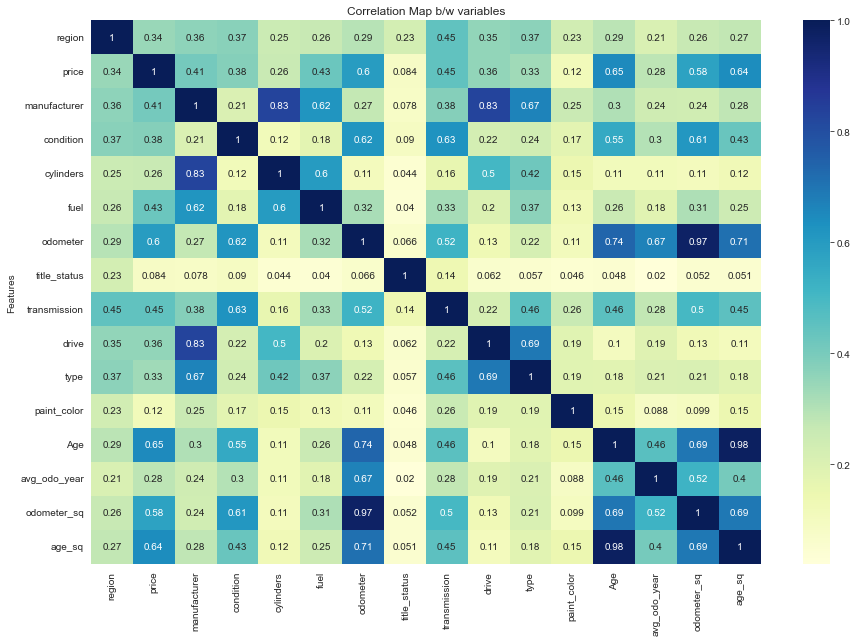

In [131]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(Corr_mat1, annot = True, cmap="YlGnBu")
plt.title('Correlation Map b/w variables')
plt.ylabel('Features')
plt.show()

### Dividing all the feature variables into X and the target variable into y

In [132]:
X = cleaned_df1.drop(columns = ["description", "year", "price", "price_norm"])
y = cleaned_df1["price"]
y_norm = cleaned_df1["price_norm"]

In [133]:
X.columns

Index(['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'image_available', 'desc_available', 'Age', 'avg_odo_year',
       'odometer_sq', 'age_sq'],
      dtype='object')

In [134]:
def preprocess_cylinders(i):
    if i=='0 cylinders':
        i='zero_cylinder'
    elif i=='3 cylinders':
        i='three_cylinders'
    elif i=='4 cylinders':
        i='four_cylinders'
    elif i=='5 cylinders':
        i='five_cylinders'
    elif i=='6 cylinders':
        i='six_cylinders'
    elif i=='8 cylinders':
        i='eight_cylinders'
    elif i=='10 cylinders':
        i='ten_cylinders'
    elif i=='12 cylinders':
        i='twelve_cylinders'
    return i
X['cylinders']=X['cylinders'].apply(lambda x: preprocess_cylinders(x))

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [136]:
## Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y_norm, test_size=0.2, random_state= 21)

In [137]:
scaler=StandardScaler()
for i in ['odometer','Age',"avg_odo_year","age_sq"]:
    X_train[i]=scaler.fit_transform(X_train[i].values.reshape(-1,1))
    X_test[i]=scaler.fit_transform(X_test[i].values.reshape(-1,1))

One Hot encoding for categorical variables

In [138]:
from sklearn.feature_extraction.text import CountVectorizer
feature_cols = [] ## this list to store feature names
vectorizers = []

In [139]:
vectorizer_region=CountVectorizer(binary=True)
x_train_region_ohe=vectorizer_region.fit_transform(X_train['region'].values)
x_test_region_ohe=vectorizer_region.transform(X_test['region'].values)
feature_cols.append(vectorizer_region.get_feature_names_out())
vectorizers.append(vectorizer_region)

In [140]:
feature_cols

[array(['abilene', 'adirondacks', 'akron', 'alaska', 'albany',
        'albuquerque', 'alene', 'altoona', 'amarillo', 'ames', 'anchorage',
        'anderson', 'angeles', 'angelo', 'ann', 'annapolis', 'anniston',
        'antonio', 'appleton', 'arbor', 'area', 'arthur', 'asheville',
        'ashland', 'ashtabula', 'athens', 'atlanta', 'auburn', 'augusta',
        'augustine', 'austin', 'bakersfield', 'baltimore', 'banks',
        'barbara', 'barre', 'baton', 'battle', 'bay', 'baycity', 'beach',
        'beaumont', 'bellingham', 'bemidji', 'bend', 'billings', 'biloxi',
        'binghamton', 'birmingham', 'bismarck', 'bloomington', 'bluffs',
        'boise', 'boone', 'boston', 'boulder', 'bowling', 'bozeman',
        'bradenton', 'brainerd', 'brownsville', 'brunswick', 'buffalo',
        'butte', 'cambridge', 'canton', 'cape', 'carlsbad', 'catskills',
        'cedar', 'central', 'ch', 'champaign', 'charles', 'charleston',
        'charlotte', 'charlottesville', 'chattanooga', 'chautauqua'

In [141]:
vectorizers

[CountVectorizer(binary=True)]

In [142]:
vectorizer_condition=CountVectorizer(binary=True)
x_train_condition_ohe=vectorizer_condition.fit_transform(X_train['condition'].astype('str').values)
x_test_condition_ohe=vectorizer_condition.transform(X_test['condition'].astype('str').values)
feature_cols.append(vectorizer_condition.get_feature_names_out())
vectorizers.append(vectorizer_condition)

In [143]:
vectorizer_fuel=CountVectorizer(binary=True)
x_train_fuel_ohe=vectorizer_fuel.fit_transform(X_train['fuel'].astype('str').values)
x_test_fuel_ohe=vectorizer_fuel.transform(X_test['fuel'].astype('str').values)
feature_cols.append(vectorizer_fuel.get_feature_names_out())
vectorizers.append(vectorizer_fuel)

In [144]:
vectorizer_cyl=CountVectorizer(binary=True)
x_train_cyl_ohe=vectorizer_cyl.fit_transform(X_train['cylinders'].astype('str').values)
x_test_cyl_ohe=vectorizer_cyl.transform(X_test['cylinders'].astype('str').values)
feature_cols.append(vectorizer_cyl.get_feature_names_out())
vectorizers.append(vectorizer_cyl)

In [145]:
vectorizer_title=CountVectorizer(binary=True)
x_train_title_ohe=vectorizer_title.fit_transform(X_train['title_status'].astype('str').values)
x_test_title_ohe=vectorizer_title.transform(X_test['title_status'].astype('str').values)
feature_cols.append(vectorizer_title.get_feature_names_out())
vectorizers.append(vectorizer_title)

In [146]:
vectorizer_transmission=CountVectorizer(binary=True)
x_train_transmission_ohe=vectorizer_transmission.fit_transform(X_train['transmission'].astype('str').values)
x_test_transmission_ohe=vectorizer_transmission.transform(X_test['transmission'].astype('str').values)
feature_cols.append(vectorizer_transmission.get_feature_names_out())
vectorizers.append(vectorizer_transmission)

In [147]:
vectorizer_type=CountVectorizer(binary=True)
x_train_type_ohe=vectorizer_type.fit_transform(X_train['type'].astype('str').values)
x_test_type_ohe=vectorizer_type.transform(X_test['type'].astype('str').values)
feature_cols.append(vectorizer_type.get_feature_names_out())
vectorizers.append(vectorizer_type)

In [148]:
vectorizer_drive=CountVectorizer(binary=True)
x_train_drive_ohe=vectorizer_drive.fit_transform(X_train['drive'].astype('str').values)
x_test_drive_ohe=vectorizer_drive.transform(X_test['drive'].astype('str').values)
feature_cols.append(vectorizer_drive.get_feature_names_out())
vectorizers.append(vectorizer_drive)

In [149]:
vectorizer_mf=CountVectorizer(binary=True)
x_train_mf_ohe=vectorizer_mf.fit_transform(X_train['manufacturer'].astype('str').values)
x_test_mf_ohe=vectorizer_mf.transform(X_test['manufacturer'].astype('str').values)
feature_cols.append(vectorizer_mf.get_feature_names_out())
vectorizers.append(vectorizer_mf)

In [150]:
feature_cols

[array(['abilene', 'adirondacks', 'akron', 'alaska', 'albany',
        'albuquerque', 'alene', 'altoona', 'amarillo', 'ames', 'anchorage',
        'anderson', 'angeles', 'angelo', 'ann', 'annapolis', 'anniston',
        'antonio', 'appleton', 'arbor', 'area', 'arthur', 'asheville',
        'ashland', 'ashtabula', 'athens', 'atlanta', 'auburn', 'augusta',
        'augustine', 'austin', 'bakersfield', 'baltimore', 'banks',
        'barbara', 'barre', 'baton', 'battle', 'bay', 'baycity', 'beach',
        'beaumont', 'bellingham', 'bemidji', 'bend', 'billings', 'biloxi',
        'binghamton', 'birmingham', 'bismarck', 'bloomington', 'bluffs',
        'boise', 'boone', 'boston', 'boulder', 'bowling', 'bozeman',
        'bradenton', 'brainerd', 'brownsville', 'brunswick', 'buffalo',
        'butte', 'cambridge', 'canton', 'cape', 'carlsbad', 'catskills',
        'cedar', 'central', 'ch', 'champaign', 'charles', 'charleston',
        'charlotte', 'charlottesville', 'chattanooga', 'chautauqua'

In [151]:
x_train_condition_ohe

<34276x6 sparse matrix of type '<class 'numpy.int64'>'
	with 38962 stored elements in Compressed Sparse Row format>

In [152]:
x_odometer=X_train['odometer'].values.reshape(-1,1)
x_odometer_test=X_test['odometer'].values.reshape(-1,1)
x_odometer_sq=X_train['odometer_sq'].values.reshape(-1,1)
x_odometer_sq_test=X_test['odometer_sq'].values.reshape(-1,1)
x_avgodo=X_train['avg_odo_year'].values.reshape(-1,1)
x_avgodo_test=X_test['avg_odo_year'].values.reshape(-1,1)
x_age=X_train['Age'].values.reshape(-1,1)
x_age_test=X_test['Age'].values.reshape(-1,1)
x_age_sq=X_train['age_sq'].values.reshape(-1,1)
x_age_sq_test=X_test['age_sq'].values.reshape(-1,1)
x_desc_available = X_train["desc_available"].values.reshape(-1,1)
x_desc_available_test = X_test["desc_available"].values.reshape(-1,1)
x_image_available = X_train["image_available"].values.reshape(-1,1)
x_image_available_test = X_test["image_available"].values.reshape(-1,1)

In [153]:
X_train.columns

Index(['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'image_available', 'desc_available', 'Age', 'avg_odo_year',
       'odometer_sq', 'age_sq'],
      dtype='object')

In [154]:
from scipy.sparse import hstack
#conactinating all the features
X_train_total=hstack((x_train_region_ohe,x_train_condition_ohe,x_train_fuel_ohe,x_train_cyl_ohe,x_train_title_ohe,x_train_transmission_ohe,x_train_type_ohe,x_train_drive_ohe,x_train_mf_ohe,x_odometer,x_age,x_avgodo,x_desc_available,x_image_available)).tocsr()

In [155]:
X_test_total=hstack((x_test_region_ohe,x_test_condition_ohe,x_test_fuel_ohe,x_test_cyl_ohe,x_test_title_ohe,x_test_transmission_ohe,x_test_type_ohe,x_test_drive_ohe,x_test_mf_ohe,x_odometer_test,x_age_test,x_avgodo_test,x_desc_available_test, x_image_available_test)).tocsr()

In [156]:
features=[]
for i in feature_cols[0:]:
    for j in i:
        features.append(j)
features.append('odometer')
features.append('age')
#features.append('odometer_sq') ----Removing these two features as they are not affecting the model anymore than the odometer and age
#features.append('age_sq')
features.append('avg_odo_year')
features.append('image_available')
features.append('desc_available')

In [157]:
features

['abilene',
 'adirondacks',
 'akron',
 'alaska',
 'albany',
 'albuquerque',
 'alene',
 'altoona',
 'amarillo',
 'ames',
 'anchorage',
 'anderson',
 'angeles',
 'angelo',
 'ann',
 'annapolis',
 'anniston',
 'antonio',
 'appleton',
 'arbor',
 'area',
 'arthur',
 'asheville',
 'ashland',
 'ashtabula',
 'athens',
 'atlanta',
 'auburn',
 'augusta',
 'augustine',
 'austin',
 'bakersfield',
 'baltimore',
 'banks',
 'barbara',
 'barre',
 'baton',
 'battle',
 'bay',
 'baycity',
 'beach',
 'beaumont',
 'bellingham',
 'bemidji',
 'bend',
 'billings',
 'biloxi',
 'binghamton',
 'birmingham',
 'bismarck',
 'bloomington',
 'bluffs',
 'boise',
 'boone',
 'boston',
 'boulder',
 'bowling',
 'bozeman',
 'bradenton',
 'brainerd',
 'brownsville',
 'brunswick',
 'buffalo',
 'butte',
 'cambridge',
 'canton',
 'cape',
 'carlsbad',
 'catskills',
 'cedar',
 'central',
 'ch',
 'champaign',
 'charles',
 'charleston',
 'charlotte',
 'charlottesville',
 'chattanooga',
 'chautauqua',
 'chicago',
 'chico',
 'chillic

In [158]:
print('Final Training data shape',X_train_total.shape)
print('Final Test data shape',X_test_total.shape)

Final Training data shape (34276, 613)
Final Test data shape (8569, 613)


In [159]:
X_train_total

<34276x613 sparse matrix of type '<class 'numpy.float64'>'
	with 509244 stored elements in Compressed Sparse Row format>

## ML modelling
creating some functions to measure performance and metrics.

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, f1_score, accuracy_score

In [202]:
#the model will predict some values negative so this function will convert it to positive.
def convert_pos(y_test_pred):
    pos=[]
    for i in y_test_pred:
        if i<0:
            pos.append(-i)
        else:
            pos.append(i)
    return pos

In [203]:
#This function will predict the scores for all performance metrics
def performance_metric(X_test,y_test,model):
    y_test_pred=model.predict(X_test)  
    y_test_pred=np.array(inv_boxcox(convert_pos(y_test_pred),lam_price))
    y_test=np.array(inv_boxcox(convert_pos(y_test),lam_price))
    print('mean absolute error is: ',mean_absolute_error(y_test,y_test_pred))
    print('mape is :',np.mean(np.abs((y_test - y_test_pred) / y_test))*100)
    print('mean squared error is: ',mean_squared_error(y_test,y_test_pred))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))
    print('R2_score is: ',r2_score(y_test,y_test_pred))
    n=X_test.shape[0]
    p=X_test.shape[1]
    print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_test_pred))*((n-1)/(n-p-1)))




In [204]:
#This Function will plot the Feature importances for ensemble models
def plot_impfeatures(model,Features):
    features = Features
    importances = model.feature_importances_
    indices = (np.argsort(importances))[-50:]
    plt.figure(figsize=(10,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='r', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [205]:
#this function plots the actual and predicted prices comparison
def compare_plot(X_test,y_test,model):
    y_test_pred=model.predict(X_test)  
    y_test_pred=np.array(inv_boxcox(convert_pos(y_test_pred),lam_price))
    y_test=np.array(inv_boxcox(convert_pos(y_test),lam_price))
    Comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
    Comparison.sample(20).plot(kind='bar',figsize=(10,5))
    plt.grid(which='major', linestyle='-', linewidth='0.2', color='Black')
    plt.title('Performance of {}'.format(model))
    plt.ylabel('Price')
    plt.xlabel('Cars Index')
    plt.show()

### 1. Dummy regressor

In [165]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()

In [166]:
dummy_model = dummy.fit(X_train_total,y_train)

In [167]:
performance_metric(X_test_total,y_test,dummy_model)

mean absolute error is:  11092.722137226538
mape is : 171.10771978372088
mean squared error is:  211698309.22592136
RMSE:  14549.855986432352
R2_score is:  -0.050779626617156515
Adjusted R2 score is:  -0.13175107993158974


In [168]:
y_dum_pred = dummy_model.predict(X_test_total)

n=X_test.shape[0]
p=X_test.shape[1]
print("MAE", mean_absolute_error(y_test, y_dum_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_dum_pred)))
print('mape is :',np.mean(np.abs((y_test - y_dum_pred) / y_test))*100)
print("R2_score: ", r2_score(y_test, y_dum_pred))
print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_dum_pred))*((n-1)/(n-p-1)))

MAE 22.770940080540438
RMSE 27.46583568599734
mape is : 33.743389034355474
R2_score:  -0.00035459066405207906
Adjusted R2 score is:  -0.0023433671862469474


### 2. Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
LR = LinearRegression(fit_intercept=False)
lr_model = LR.fit(X_train_total,y_train)

In [171]:
performance_metric(X_test_total,y_test,LR)

mean absolute error is:  5180.305188974778
mape is : 109.43111657782671
mean squared error is:  64908121.355912514
RMSE:  8056.55766167614
R2_score is:  0.677823919462671
Adjusted R2 score is:  0.6529975288442696


In [172]:
y_lr_pred = lr_model.predict(X_test_total)
print("MAE", mean_absolute_error(y_test, y_lr_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_lr_pred)))
print('mape is :',np.mean(np.abs((y_test - y_lr_pred) / y_test))*100)
print("R2_score: ", r2_score(y_test, y_lr_pred))
print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_lr_pred))*((n-1)/(n-p-1)))

MAE 10.474158023846131
RMSE 15.793383835022519
mape is : 17.145132100506473
R2_score:  0.6692356345696739
Adjusted R2 score is:  0.6685780513382021


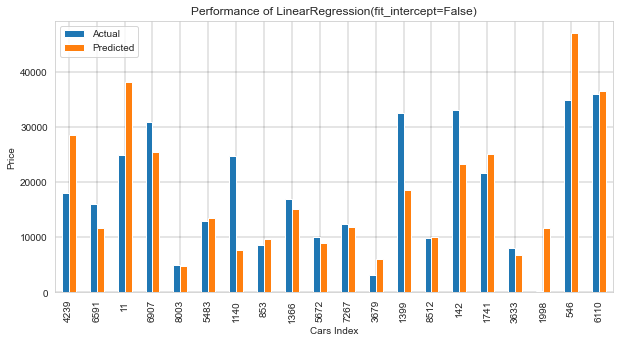

In [173]:
compare_plot(X_test_total,y_test,LR)

In [174]:
type(y_test)

pandas.core.series.Series

In [175]:
check_df=pd.DataFrame(y_test)
check_df
check_df.reset_index()
check_df["y_pred"] = y_lr_pred
check_df
check_df["diff"] = abs(check_df["price_norm"]-check_df.y_pred)
check_df

,price_norm,y_pred,diff
27191,90.766221,91.503117,0.736896
21784,113.034659,116.166295,3.131636
18635,87.885892,99.770586,11.884694
48066,132.640080,107.168585,25.471495
32626,71.688627,75.043259,3.354632
...,...,...,...
16264,124.967085,113.611135,11.355951
8163,82.286153,79.559914,2.726239
915,88.700244,93.387049,4.686805
41842,98.392155,89.547152,8.845003


In [176]:
check_df.describe()

,price_norm,y_pred,diff
count,8569.000000,8569.000000,8569.000000
mean,87.671931,88.015153,10.474158
std,27.462570,22.714703,11.821138
min,16.026985,18.303803,0.000354
25%,66.947482,70.593894,3.459372
50%,87.885892,86.621174,7.242594
75%,109.492687,104.485256,13.400056
max,174.971415,160.036510,129.496997


In [177]:
check_df = check_df[check_df["diff"] < 100]

In [178]:
print("MAE", mean_absolute_error(check_df["price_norm"], check_df.y_pred))
print("RMSE", np.sqrt(mean_squared_error(check_df["price_norm"], check_df.y_pred)))
print('mape is :',np.mean(np.abs((check_df["price_norm"], check_df.y_pred) / check_df["price_norm"]))*100)
print("R2_score: ", r2_score(check_df["price_norm"], check_df.y_pred))
#print('Adjusted R2 score is: ',1-(1-r2_score(check_df["price_norm"], check_df.y_pred))*((n-1)/(n-p-1)))

MAE 10.371708366058794
RMSE 15.406783740903773


ValueError: Length of values (2) does not match length of index (8560)

### 3. Lasso Regression:

In [179]:
from sklearn.linear_model import Lasso

In [180]:
ls = Lasso(alpha= 0.001, max_iter=2000)
ls_model = ls.fit(X_train_total,y_train)

In [181]:
performance_metric(X_test_total,y_test,ls)

mean absolute error is:  5159.419133026663
mape is : 109.90022461371989
mean squared error is:  64637063.2366635
RMSE:  8039.7178580260825
R2_score is:  0.6791693357315939
Adjusted R2 score is:  0.6544466208105967


In [182]:
y_ls_pred = ls_model.predict(X_test_total)
print("MAE", mean_absolute_error(y_test, y_ls_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_ls_pred)))
print('mape is :',np.mean(np.abs((y_test - y_ls_pred) / y_test))*100)
print("R2_score: ", r2_score(y_test, y_ls_pred))
print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_ls_pred))*((n-1)/(n-p-1)))

MAE 10.43346237429851
RMSE 15.779623634784182
mape is : 17.115176330486157
R2_score:  0.66981174938079
Adjusted R2 score is:  0.6691553115067956


### 4. ElasticNet Regression

In [183]:
from sklearn.linear_model import ElasticNet

In [184]:
en = ElasticNet(alpha=0.001, max_iter=5000)
en_model = en.fit(X_train_total, y_train)

In [185]:
performance_metric(X_test_total,y_test,en)

mean absolute error is:  5150.28708520129
mape is : 111.1138842292359
mean squared error is:  64591237.79939613
RMSE:  8036.867412082654
R2_score is:  0.6793967935513443
Adjusted R2 score is:  0.6546916061782424


In [186]:
y_en_pred = en_model.predict(X_test_total)
print("MAE", mean_absolute_error(y_test, y_en_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_en_pred)))
print('mape is :',np.mean(np.abs((y_test - y_en_pred) / y_test))*100)
print("R2_score: ", r2_score(y_test, y_en_pred))
print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_en_pred))*((n-1)/(n-p-1)))

MAE 10.415610677562302
RMSE 15.793459545987828
mape is : 17.139946474586218
R2_score:  0.6692324632987565
Adjusted R2 score is:  0.6685748737625712


### 4. RandomForest Regressor

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
rf =  RandomForestRegressor(n_jobs= -1, max_depth= 20, n_estimators = 50, max_features = 'auto')

In [189]:
rf_model = rf.fit(X_train_total,y_train)

In [190]:
#performance_metric(X_train_total,y_train,rf)

In [191]:
performance_metric(X_test_total,y_test,rf)

mean absolute error is:  4252.875531245202
mape is : 101.91243716652833
mean squared error is:  50786149.51338196
RMSE:  7126.440171178171
R2_score is:  0.7479193319109405
Adjusted R2 score is:  0.7284943853944612


In [192]:
y_rf_pred = rf_model.predict(X_test_total)
print("MAE", mean_absolute_error(y_test, y_rf_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_rf_pred)))
print('mape is :',np.mean(np.abs((y_test - y_rf_pred) / y_test))*100)
print("R2_score: ", r2_score(y_test, y_rf_pred))
print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_rf_pred))*((n-1)/(n-p-1)))

MAE 8.951315131675678
RMSE 14.749338111624308
mape is : 15.218244581096105
R2_score:  0.711521535851255
Adjusted R2 score is:  0.7109480200179573


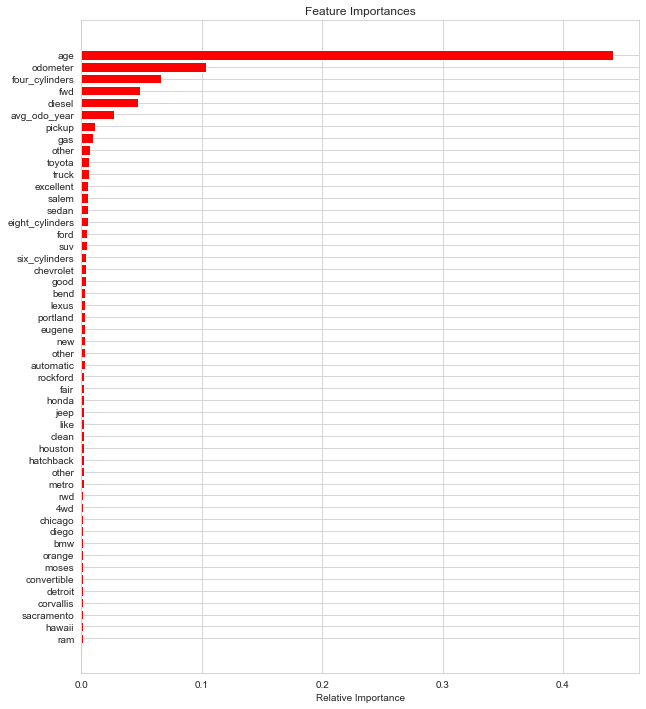

In [193]:
plot_impfeatures(rf, features)

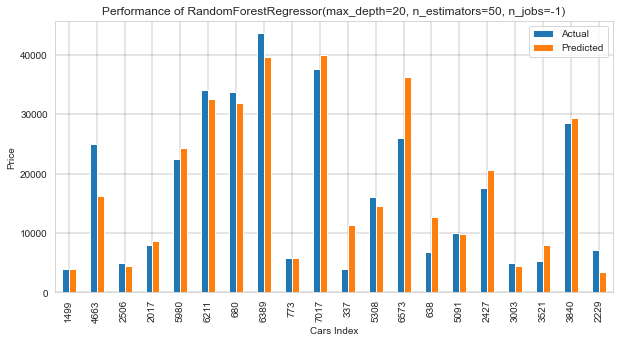

In [194]:
compare_plot(X_test_total,y_test,rf)

In [548]:
"""
param_grid_rf = [
{'n_estimators': [100, 150],
'max_features': ['auto', 'sqrt'],
'max_depth': [10,15],
'min_samples_split': [5, 10],
'min_samples_leaf': [2, 4],
'bootstrap': [True, False]}
]

"""

"\nparam_grid_rf = [\n{'n_estimators': [100, 150],\n'max_features': ['auto', 'sqrt'],\n'max_depth': [10,15],\n'min_samples_split': [5, 10],\n'min_samples_leaf': [2, 4],\n'bootstrap': [True, False]}\n]\n\n"

In [ ]:
#rf_model = RandomForestRegressor()
#clf_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, cv = 3, verbose=True, n_jobs = -1)

In [ ]:
#best_clf_rf = clf_rf.fit(X_train_total,y_train)

### Support Vector Machine

In [549]:
from sklearn.svm import SVR

In [550]:
svr = SVR(kernel = 'linear')
svr_model = svr.fit(X_train_total, y_train)

In [551]:
#performance_metric(X_train_total,y_train,svr)

In [552]:
performance_metric(X_test_total,y_test,svr)

mean absolute error is:  5056.678609189214
mape is : 124.90544797325
mean squared error is:  65268817.459439605
RMSE:  8078.911898234786
R2_score is:  0.6760335786783145
Adjusted R2 score is:  0.6510692271672909


In [553]:
y_svr_pred = svr_model.predict(X_test_total)
print("MAE", mean_absolute_error(y_test, y_svr_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_svr_pred)))
print('mape is :',np.mean(np.abs((y_test - y_svr_pred) / y_test))*100)
print("R2_score: ", r2_score(y_test, y_svr_pred))
print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_svr_pred))*((n-1)/(n-p-1)))

MAE 10.171066983990661
RMSE 16.090989152945383
mape is : 17.256221929499453
R2_score:  0.6566525561664562
Adjusted R2 score is:  0.6559699568745407


### ADA Boost regressor

In [554]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

In [564]:
ada = AdaBoostRegressor(n_estimators= 100, random_state= 21)
ada_model = ada.fit(X_train_total, y_train)

In [565]:
performance_metric(X_train_total,y_train, ada)

mean absolute error is:  9019.748413202018
mape is : 110.63252086738305
mean squared error is:  171530798.14271206
RMSE:  13096.976679475003
R2_score is:  0.16357692271197444
Adjusted R2 score is:  0.14834528625610266


In [566]:
performance_metric(X_test_total,y_test,ada)

mean absolute error is:  8795.30409131231
mape is : 106.20868388306353
mean squared error is:  164335541.10101762
RMSE:  12819.342459776071
R2_score is:  0.18430884427247063
Adjusted R2 score is:  0.12145294503161896


In [567]:
y_ada_pred = ada_model.predict(X_test_total)
print("MAE", mean_absolute_error(y_test, y_ada_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_ada_pred)))
print('mape is :',np.mean(np.abs((y_test - y_ada_pred) / y_test))*100)
print("R2_score: ", r2_score(y_test, y_ada_pred))
print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_ada_pred))*((n-1)/(n-p-1)))

MAE 17.590257546618833
RMSE 22.381143858689935
mape is : 24.0397324875213
R2_score:  0.335747967697158
Adjusted R2 score is:  0.33442738711603903


In [196]:
from xgboost import XGBRegressor

In [224]:
# xgb=XGBRegressor(**param)
xgb = XGBRegressor(max_depth=10,n_estimators=500, tree_method='gpu_hist')
xgb_model = xgb.fit(X_train_total,y_train)

In [222]:
performance_metric(X_train_total,y_train,xgb)

mean absolute error is:  2269.883335858302
mape is : 24.132971254670053
mean squared error is:  12507812.610134214
RMSE:  3536.6386032692417
R2_score is:  0.9390090687690599
Adjusted R2 score is:  0.9378983967696372


In [223]:
performance_metric(X_test_total,y_test,xgb)

mean absolute error is:  4453.123113917782
mape is : 93.25254802842794
mean squared error is:  50326452.30712833
RMSE:  7094.113919801988
R2_score is:  0.75020107171562
Adjusted R2 score is:  0.7309519525404692


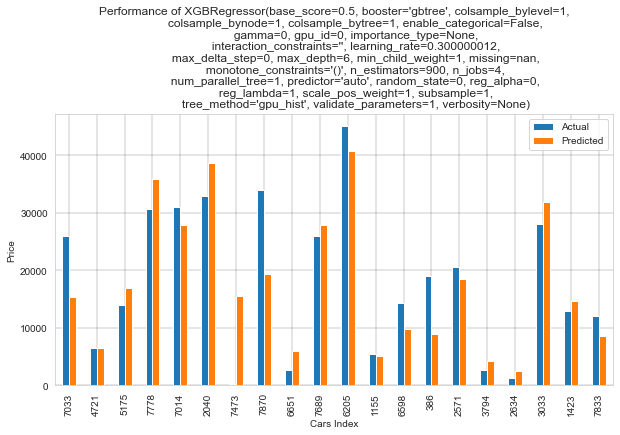

In [207]:
compare_plot(X_test_total,y_test,xgb)

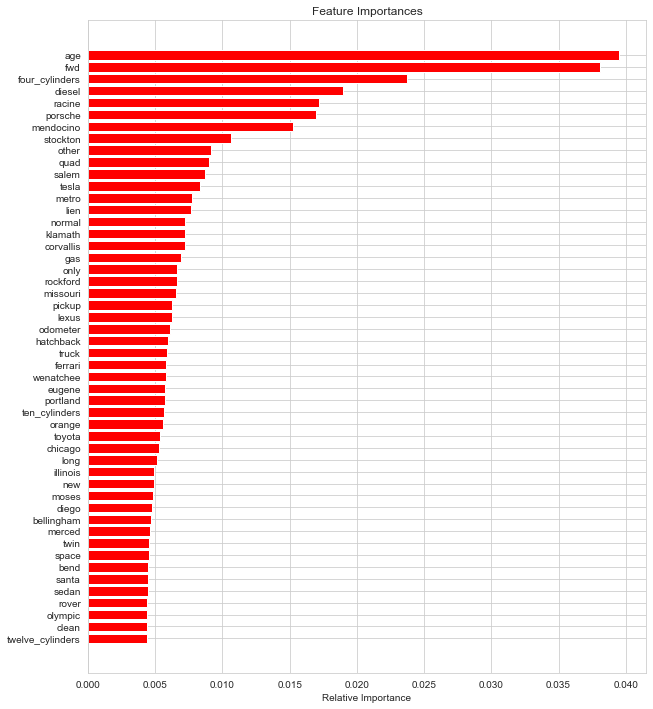

In [208]:
plot_impfeatures(xgb,features)